#### Dependencies


In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense,LSTM

#### Creating our Dataset

In [ ]:
with open("words.txt","r") as file:
    text=file.read()

In [ ]:
print(text)

In [ ]:
w_len=len(text)
indx=[]
for i in range(w_len):
    if text[i]==".":
        indx.append(i)

Extracting sentence from given text

In [ ]:
sentence=[]
j=0
for ind in indx:
    sen=text[j:ind]
    sentence.append(sen)
    j=ind+1

In [ ]:
sentence[6]

In [ ]:
tokenizer=Tokenizer()

In [ ]:
tokenizer.fit_on_texts([text])

In [ ]:
tokenizer.word_index

In [ ]:
len(tokenizer.word_counts)

In [ ]:
df=pd.DataFrame(columns=["Input","Output"])

In [ ]:
sentence=tokenizer.texts_to_sequences(sentence)

In [ ]:
for sen in sentence:
    leng = len(sen)       # len is now the built-in function

    for i in range(leng):
        df = pd.concat([df, pd.DataFrame([{"Input": sen[0:i], "Output": sen[i]}])],ignore_index=True)
       

In [ ]:
df=df.iloc[1:]

In [ ]:
df

So we have coverted the text into int endoded arrays and got input and output as dataset. now we need to zero padd inputs to make them uniform

In [ ]:
x=df["Input"]
y=df["Output"]

In [ ]:
x=np.array(x)
y=np.array(y)

In [ ]:
seq_leng=[len(x) for x in x]
max_len=max(seq_leng)
max_len

In [ ]:
x=pad_sequences(x,maxlen=max_len,padding="pre")

In [ ]:
x.shape

In [ ]:
## total words in vocabulary
vocab_size = x.max()

In [ ]:
y=np.reshape(y,(-1,1))

In [ ]:
y

In [ ]:
type(y)

Using OHE on output data

In [ ]:
ohe=OneHotEncoder(sparse_output=False)
y=ohe.fit_transform(y)

In [ ]:
y.shape

In [ ]:
len(tokenizer.word_index)

So No of words = no of columns in output

In [ ]:
input_l=x.shape[(1)]
model=Sequential([
    Embedding(input_dim=vocab_size+1,output_dim=100,input_length=input_l), ### there are 229 words and each OHEed x has 23 len
    LSTM(150), # each LSTM cell will have 150 neurons in it(1 layer)
    Dense(vocab_size,activation="softmax") # 229 words so 229 classes
])

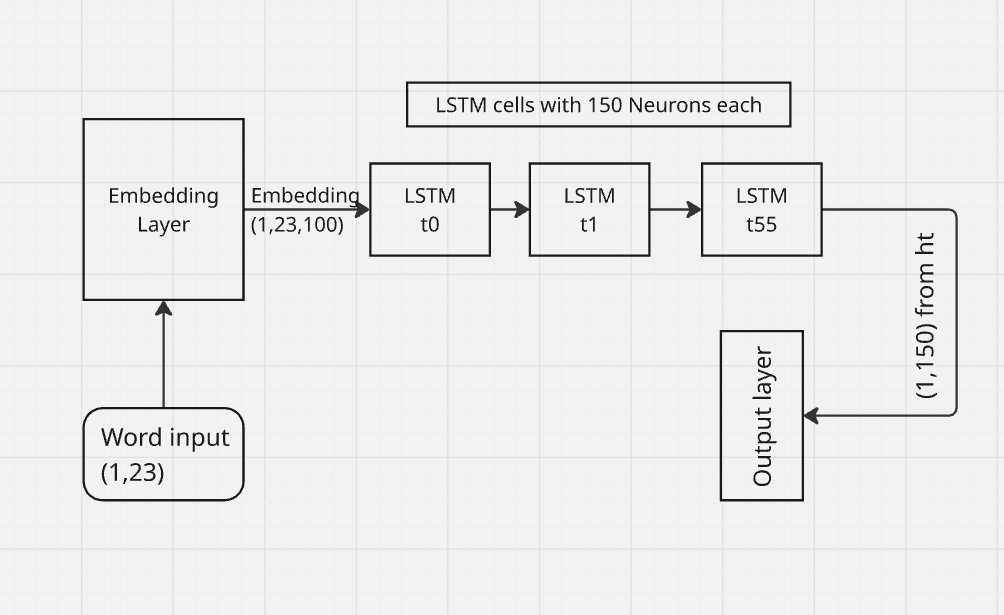

In [ ]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [ ]:
model.summary()

In [ ]:
model.fit(x,y,epochs=100)

Predicting a word

In [ ]:
word="Each new day i want "
## tokeizing the text
word_token=tokenizer.texts_to_sequences([word])[0]
## paddeing
word_pad=pad_sequences([word_token],maxlen=max_len)

In [ ]:
tokenizer.word_index

In [102]:
import time
text = "It feel like"
for i in range(4):
    word_token = tokenizer.texts_to_sequences([text])[0]
    word_pad = pad_sequences([word_token], maxlen=max_len,padding="pre")
    predict = model.predict(word_pad)
    index = np.argmax(predict)
    for word_, indx in tokenizer.word_index.items():
        if indx==index:
            text = text + " " + word_
            print(text)
            time.sleep(3)    


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
It feel like and
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


In [ ]:
import time
text = "Many people liked"

for i in range(10):
  # tokenize
  token_text = tokenizer.texts_to_sequences([text])[0]
  # padding
  padded_token_text = pad_sequences([token_text], maxlen=56, padding='pre')
  # predict
  pos = np.argmax(model.predict(padded_token_text))

  for word,index in tokenizer.word_index.items():
    if index == pos:
      text = text + " " + word
      print(text)
      time.sleep(5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
